In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models,layers,optimizers,utils
import numpy as np
import matplotlib.pyplot as plt

# **Loading Data**

In [3]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
print(len(train_data))
print(len(test_data))

8982
2246


In [5]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

# **Perparing the Data**

In [0]:
def vectorize_sequences(sequences,dimension=10000):
  results =np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels,dimension=46):
  results =np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

## **OR**

In [0]:
one_hot_train_labels = utils.to_categorical(train_labels)
one_hot_test_labels = utils.to_categorical(test_labels)

In [0]:
x_val =X_train[:1000]
partial_X_train= X_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

# **Building Network**

In [0]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

# **Compile**

In [13]:
model.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['acc'])
history = model.fit(partial_X_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 59ms/step - loss: 2.5509 - acc: 0.5003 - val_loss: 1.6981 - val_acc: 0.6450
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.3757 - acc: 0.7060 - val_loss: 1.2892 - val_acc: 0.7250
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.0254 - acc: 0.7754 - val_loss: 1.1136 - val_acc: 0.7490
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8071 - acc: 0.8266 - val_loss: 1.0170 - val_acc: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6390 - acc: 0.8637 - val_loss: 0.9495 - val_acc: 0.8030
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5113 - acc: 0.8905 - val_loss: 0.8933 - val_acc: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4098 - acc: 0.9148 - val_loss: 0.8957 - val_acc: 0.8120
Epoch 8/20
16/16 [==============================] - 1s 52ms/step - loss: 0.3364 - a

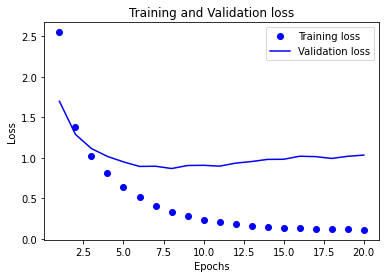

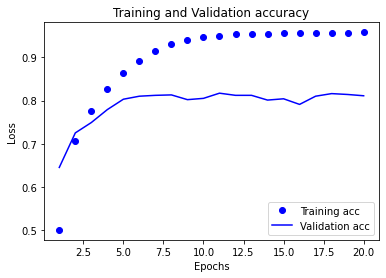

In [14]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range (1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label = 'Training loss')
plt.plot(epochs,val_loss_values,'b',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
acc_values=history_dict['acc']
val_acc_values =history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label = 'Training acc')
plt.plot(epochs,val_acc_values,'b',label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
predictions = model.predict(X_test)

In [19]:
predictions[0]

array([4.76213154e-06, 9.35385458e-07, 1.20114521e-07, 9.50114906e-01,
       4.66198772e-02, 5.32153155e-10, 1.10253346e-07, 1.26707337e-05,
       1.62896980e-03, 1.43366481e-06, 9.53498727e-07, 1.72478918e-04,
       9.48607351e-07, 1.56404512e-05, 1.44983003e-08, 1.21927588e-08,
       1.18492662e-05, 6.99719703e-06, 4.34849483e-07, 6.55457960e-04,
       5.04830095e-04, 1.15454037e-04, 5.23712593e-08, 1.16209287e-06,
       7.00804890e-08, 2.69785528e-06, 5.66796476e-09, 1.98141151e-07,
       8.11341920e-07, 4.99972703e-06, 6.46793410e-07, 1.23173038e-07,
       3.24586927e-06, 5.12286022e-07, 1.90554843e-07, 3.39932598e-08,
       8.77015555e-05, 5.51351695e-06, 1.13586714e-06, 2.11358310e-05,
       6.39992805e-08, 7.58144381e-07, 8.60916582e-09, 4.49433983e-08,
       4.92905022e-11, 8.09423355e-08], dtype=float32)

In [20]:
predictions.shape

(2246, 46)

In [22]:
predictions[0].sum()

1.0000001

In [23]:
predictions[0].argmax()

3

# yahi kaam hum loss function change kar k sparse_categorical_Crossentropy rakh kar bhi karwa saktay